In [1]:
import pandas as pd
import numpy as np
import nibabel as nib
import nbimporter
from functions import *
from numpy import *
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ndim = 2
unet_input_features = 2
loadable_model='200epoch_with_val.h5'

# data shape 64*64
s=(64,64)
inshape = (*s, unet_input_features)
# configure unet features 
nb_features =[
    [64, 64, 64, 64],         # encoder features
    [64, 64, 64, 64, 64, 32,16]  # decoder features
             ]
# build model using VxmDense
inshape =s
vxm_model = vxm.networks.VxmDense(inshape, nb_features, int_steps=0)
# voxelmorph has a variety of custom loss classes
losses = [vxm.losses.MSE().loss, vxm.losses.Grad('l2').loss]
# usually, we have to balance the two losses by a hyper-parameter
lambda_param = 0.05
loss_weights = [1, lambda_param]
vxm_model.compile(optimizer='Adam', loss=losses, loss_weights=loss_weights, metrics=['accuracy'])
vxm_model.load_weights(loadable_model)

In [42]:
D7_dir='/home/mahdi/Desktop/data_selection_D7'
n,name=count(D7_dir)
out_dir='/home/mahdi/Desktop/valid'
n1,name1=count(out_dir)

i=70
#x=(len(name[i][0][:])-7)
#input_direction='/home/mahdi/Desktop/centerline/'+name1[i][0]+'/output/zero_ref/'+name[i][0][:x]+'_c.'+name[i][0][-6:]
maximum_intensity=1705
sli=5
reference='100'

In [45]:
input_direction=out_dir+'/'+name1[i][0]+'/main_seg/'+name[i][0]

In [46]:
prepare_data=ref(input_direction,maximum_intensity,sli,reference)
val_input, _ = prepare_data
val_pred = vxm_model.predict(val_input)

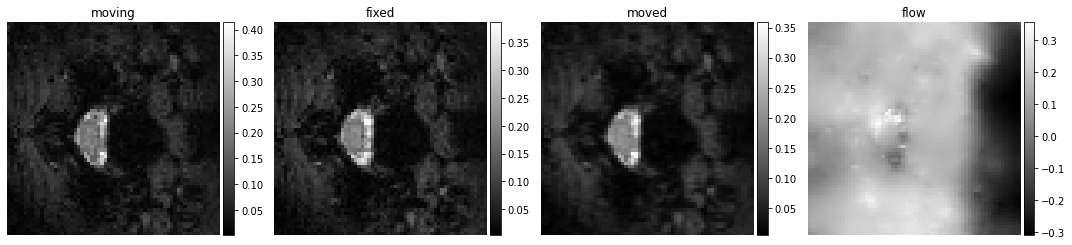

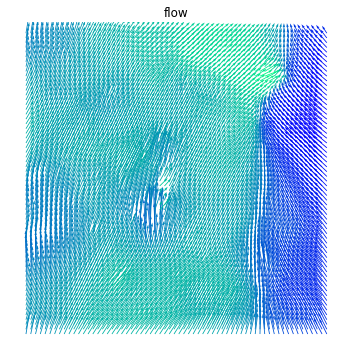

(<Figure size 360x360 with 1 Axes>, [<AxesSubplot:title={'center':'flow'}>])

In [48]:
import neurite as ne
# visualize
volume=50
images = [img[volume, :, :, 0] for img in val_input + val_pred] 
titles = ['moving', 'fixed', 'moved', 'flow']
ne.plot.slices(images, titles=titles, cmaps=['gray'], do_colorbars=True);
ne.plot.flow([val_pred[1][volume].squeeze()], width=5,titles= 'flow',grid=True,scale=.1)